# Decision Trees for Classification

Laura Choque

Decision Trees provide a rule-based, interpretable model that mimics human decision-making.
They are ideal for demonstrating how models split feature space and make decisions.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, f1_score, classification_report

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset selected especifically due to Multiclass classification

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CODVEDA_TECH_LC/dataset_for_task/1iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Key components of the task

Training an unrestricted tree

Applying pruning (max depth, minimum samples per leaf)

Evaluation using:

Accuracy

F1-score

In [ ]:
target_col = "species"  # cambia si tu CSV tiene otro nombre

X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Evaluation using:

Accuracy

F1-score

In [ ]:
y_pred_full = tree_full.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_full))
print("F1-score:", f1_score(y_test, y_pred_full, average="macro"))

Accuracy: 0.9333333333333333
F1-score: 0.9333333333333332


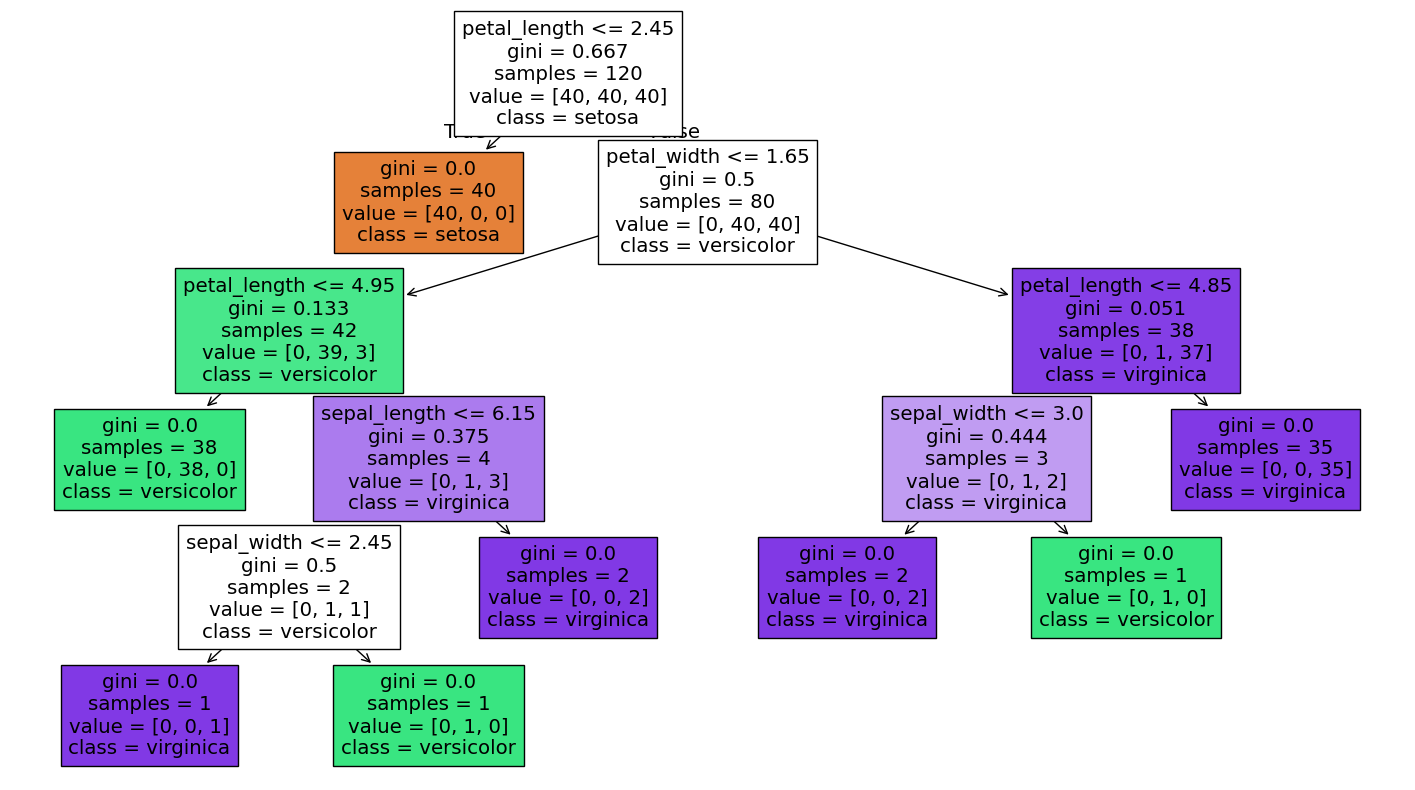

In [ ]:
plt.figure(figsize=(18,10))
plot_tree(
    tree_full,
    feature_names=X.columns,
    class_names=tree_full.classes_,
    filled=True
)
plt.show()

In [ ]:
#APPLYING PRUNNING
tree_pruned = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=5,
    random_state=42
)

tree_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
y_pred_pruned = tree_pruned.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_pruned))
print("F1-score:", f1_score(y_test, y_pred_pruned, average="macro"))

Accuracy: 0.9333333333333333
F1-score: 0.9333333333333332


Decision Tree prunned

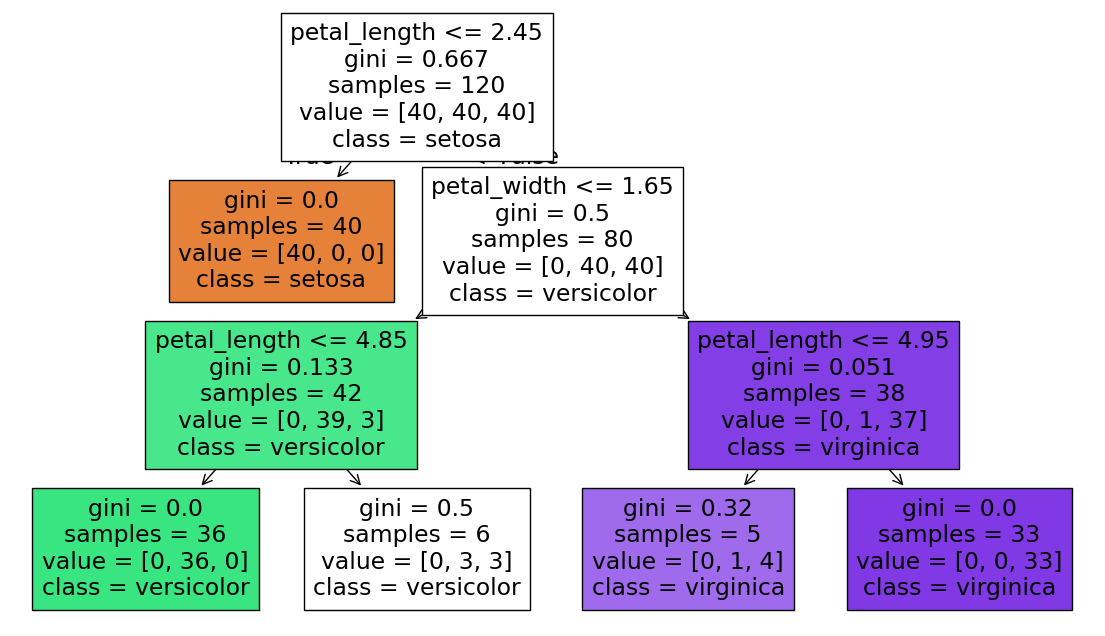

In [ ]:
plt.figure(figsize=(14,8))
plot_tree(
    tree_pruned,
    feature_names=X.columns,
    class_names=tree_pruned.classes_,
    filled=True
)
plt.show()

A decision tree-based classifier was trained to classify Iris species.
The unrestricted tree showed high performance, but with a risk of overfitting.
By applying pruning techniques through depth limitation and minimum leaf size, a simpler and more interpretable model was obtained, maintaining good performance as measured by accuracy and F1-score.